# IBM EMPLOYEE ATTRITION DATA ANALYSIS


**Definition**: "Employee attrition is defined as the natural process by which employees leave the workforce – for example, through resignation for personal reasons or retirement – and are not immediately replaced."


Attrition of employees can't be avoided. Some employees leave the company as they reach their retirement age while some leave due to many factors but not limited to lower satisfaction rate, lower pay rate, and toxic work environment. Measuring attrition can uncover many answers related to the functioning within the organisation. Higher attrition rates signal a need for further investigation.

The dataset used to examine the trends related to Employee Attrition is a fictional data set created by IBM data scientists. Using Python and its frameworks, we would try to uncover factors that might be related to the attrition levels among the employees.




In [1]:
# Importing the necessary libraries.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [3]:
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Some columns have same values and are purely redundant in this case. Hence we can drop or remove them.

cols_to_remove = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'PerformanceRating', 'StandardHours']

df = df[[col for col in df.columns if col not in cols_to_remove]]

In [5]:
# Lets check for any missing value within the data.

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Luckily the dataset does not contain any missing values. We can dig right into the data without any missing value imputations.

# DEFINING OUR METRIC: EMPLOYEE ATTRITION RATE


"Employee Attrition Rate is calculated as the percentage of employees who left the company in a given period to the total average number of employees within that period."


For example, a company starts with 1000 employees and 200 people leave within that concerned period. Additionally, if the company hired 300 more employees within the same period. The employee attrition rate would be calculated as:


Attrition Rate = Number of employee left (period) / Average number of employees (period) * 100



= 200 / ((1000+(1000-200+300)/2) * 100

= 19.05 %




Unfortunately, in our dataset we don't have a time frame column, hence it would be difficult to calculate the exact attrition rate. However, a naive way of calculating the attrition rate would be to divide the employees who left to the total number of employees in the dataset.

In [6]:
# Lets inspect our dataset a little.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [7]:
df.shape

(1470, 30)

Our Attrition columns seems to be of object type. Let's map the column to boolean type for quick calculations. This is not mandatory, but it totally depends upon your convenience. There are numerous ways to reach an answer. 


In [8]:
# Mapping the Attrition Column

mapping = {'Yes': True, 'No': False}

df.Attrition = df.Attrition.map(mapping)
df.Attrition

0        True
1       False
2        True
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Name: Attrition, Length: 1470, dtype: bool

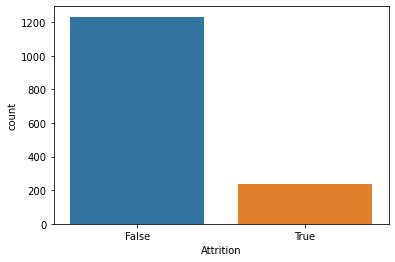

In [9]:
sns.countplot(df.Attrition)

The Attrition column is highly imbalanced.

In [10]:
# Lets find out our dataset's naive attrition rate

print(len(df[df.Attrition==True])/len(df)*100)

16.122448979591837


The naive attrition rate for our dataset sample is 16.12%.  # Remember that this rate is just from the sample. #


Attrition rates generally varies from industry to industry, and region to region. 

# Lets perform some hacker statistics to infer the attrition rate of the IBM population.


This is purely for fun. Suppose the dataset includes independent and random observations. We can try to find the confidence interval for the mean of our naive attrition rate for the population our sample is taken from. In our case, our population could be IBM total workforce.




In [11]:
# Sampling mean with confidence interval --- Defining our function

def conf_sample(data, a, b, func ,size):
    
    replicates = np.empty(size)
    
    for i in range(size):
        
        replicate = np.random.choice(data, len(data))
        
        """ This can be replaced with np.std as well"""
        replicates[i] = func(replicate)          
        
        x,y = np.percentile(replicates, [a,b])
        
    return (x,y)
    

In [12]:

conf_sample(df['Attrition'], 2.5, 97.5, np.mean, 10000)

(0.14217687074829932, 0.17959183673469387)

For a 95% confidence interval, if we run 10000 random simulations on our sample dataset, the mean attrition rate of IBM's total workforce would fall in the range between 14.3% and 18.03%. 

# EXPLORATORY DATA ANALYSIS

In [13]:
# Before running any analysis, it is very important to understand how each variable (column) relates to other variables.

# Additionally, it is important to check whether the values in the column make any sense and are they practically possible.

# The more time we spend during this stage, the better would be our understanding of the dataset.

""" Keep experimenting and researching as you play around the dataset. Be an intrigued child """


' Keep experimenting and researching as you play around the dataset. Be an intrigued child '

## Age

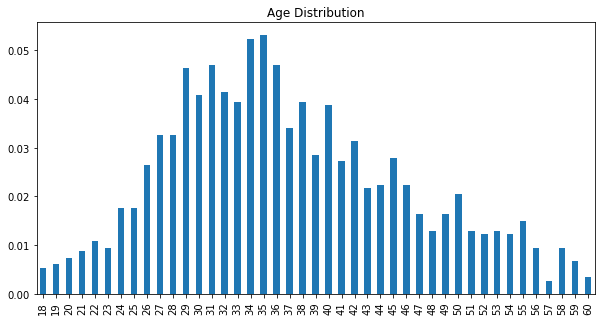

In [14]:
# Lets look at the Probability Mass Function of the employees age.


def PMF(data):
    
    return((data.value_counts().sort_index()/len(data)))


age_pmf = PMF(df['Age'])
plt.figure(figsize=(10,5))
plt.title('Age Distribution')
age_pmf.plot.bar()

In [15]:
df.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

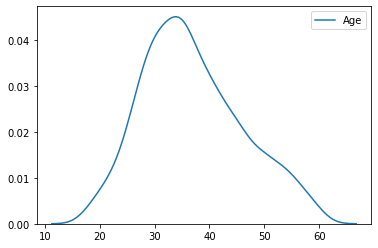

In [16]:
sns.kdeplot(df.Age)

Insights:

a) As the mean is almost approximately similar to the median, the distribution of employees' age is approximately normal with the average age of 36 years. We verified it with our kdeplot.

b) The employee's age ranges between 18 and 60, which seems to be intuitively true as majorly the unrestricted working age starts from 18 to 60. Additionally, there are no outliers present in the data.

c) Most of the employees who have been a part of the company tends to fall in the age range from 25 years to 45 years. (68-95-99 rule)

Text(0.5, 1.0, 'Age PMF of Employees Who Left')

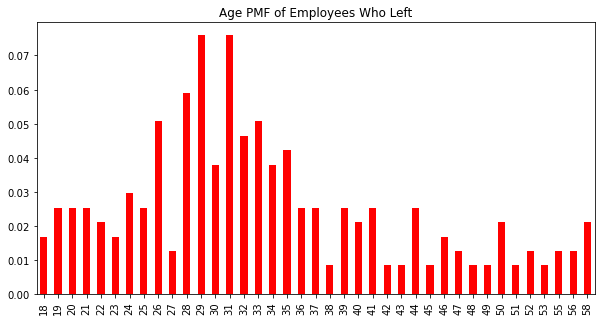

In [17]:
# Lets look at the employees who left the company.

age_pmf = PMF(df[df['Attrition']==True].Age)
plt.figure(figsize=(10,5))
age_pmf.plot.bar(color = 'r')
plt.title('Age PMF of Employees Who Left')

Insights:

a) The proportion of employees who left was comparatively less among the senior level employees. Maybe these employee were at a higher authority and were less likely to leave that position.

b) Major Attrition occured among the mid-career level employees. Career change and career growth could be one of the possibilities for such an attrition levels.

c) Followed by mid-career level employees, the attrition levels among the newer and less experienced employees seems to be the highest. These employees might have left for more lucrative offers or higher studies.

Text(45, 0.4, 'Higher Difference')

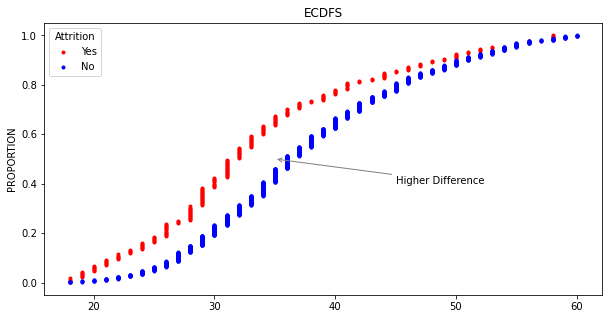

In [18]:
# Lets compare the empirical cumulative distributions of ages of two groups. (Attrited and Non Attrited Employees)


# Defining a function  for ecdf

def ecdf(data):
    
    y = (np.arange(1, len(data) + 1))/len(data)
    x = np.sort(data)
    return x,y

# PLotting the ECDFS

x_yes, y_yes = ecdf(df[df['Attrition']==True].Age)
x_no, y_no = ecdf(df[df['Attrition']==False].Age)
plt.figure(figsize=(10,5))
plt.plot(x_yes, y_yes, linestyle = 'none', marker = '.', color = 'r')
plt.plot(x_no, y_no, linestyle = 'none', marker = '.', color = 'b')
plt.ylabel('PROPORTION')
plt.title('ECDFS')
plt.legend(['Yes','No'], title = 'Attrition')

plt.annotate('Higher Difference',
             xy = (35, 0.5),
             xytext = (45, 0.4),
             arrowprops = {'arrowstyle':'->', 'color':'gray'})

Insights:


a) For every age, the fraction of people below that age who left the company is more than the fraction of people below that same age working in the company.


b) Attrited Employees seems to be younger than other group. With ECDFS, we can again see where the differences really are.

## Gender

In [19]:
df.groupby('Gender').Attrition.mean()

Gender
Female    0.147959
Male      0.170068
Name: Attrition, dtype: float64

Males tends to have a little higher attrition rate than females.

## Business Travel

In [20]:
df.groupby('BusinessTravel')['Attrition'].mean()

BusinessTravel
Non-Travel           0.080000
Travel_Frequently    0.249097
Travel_Rarely        0.149569
Name: Attrition, dtype: float64

The attrition rate across the type of travel is highly varying, but we can't conclude whether the type of travel is the cause of the possible attrition.

## Department

In [21]:
df.groupby('Department')['Attrition'].mean()



Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
Name: Attrition, dtype: float64

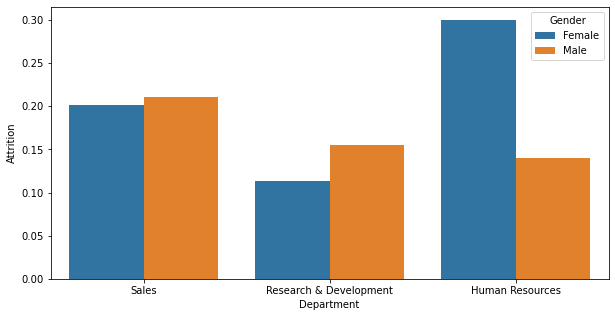

In [22]:
plt.figure(figsize=(10,5))
sns.barplot('Department','Attrition', data = df, hue = 'Gender', ci = None)

Insights:

a) Employees in R&D department seems to have less attrition rate among other department employees with higher attrition in both Human Resources and Sales Department.

b) However, when drilled down by gender, females seems to have almost twice the attrition rate as is of the males in HR department.

## Education

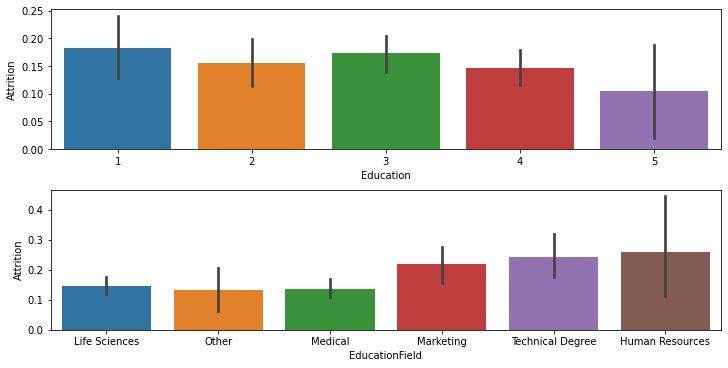

In [23]:
cols = ['Education', 'EducationField']
fig, ax = plt.subplots(len(cols),1, figsize= (10,5), constrained_layout=True)

for i, col in enumerate(cols):
    
    sns.barplot(col,'Attrition', data = df, ax = ax[i])


Insights:



a) Educational Level:

1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'


There is some correlation among the attrition rates in the educational levels. With lower education level employees having higher attrition rates.


b) Educational Field: Business and technical employees seems to have a higher tendency to leave the company than medicine employees.



## What if we hypothesize that higher attrition rates among the educational levels and educational field is due to monthly rates ?

In [24]:
df.groupby('EducationField').MonthlyRate.mean()

EducationField
Human Resources     14810.740741
Life Sciences       14530.132013
Marketing           14076.943396
Medical             14295.056034
Other               13270.780488
Technical Degree    14210.363636
Name: MonthlyRate, dtype: float64

In [25]:
df.groupby('Education').MonthlyRate.mean()

Education
1    15208.100000
2    14249.946809
3    14082.809441
4    14281.989950
5    14516.687500
Name: MonthlyRate, dtype: float64

On further inspecting the mean monthly rate among the educational variables, there is no drastic difference among the pay rates of different groups. Monthly Pay intuitively does not seem to be a reason for attrition for the educational related attrition.

## Satisfaction and Well-Being

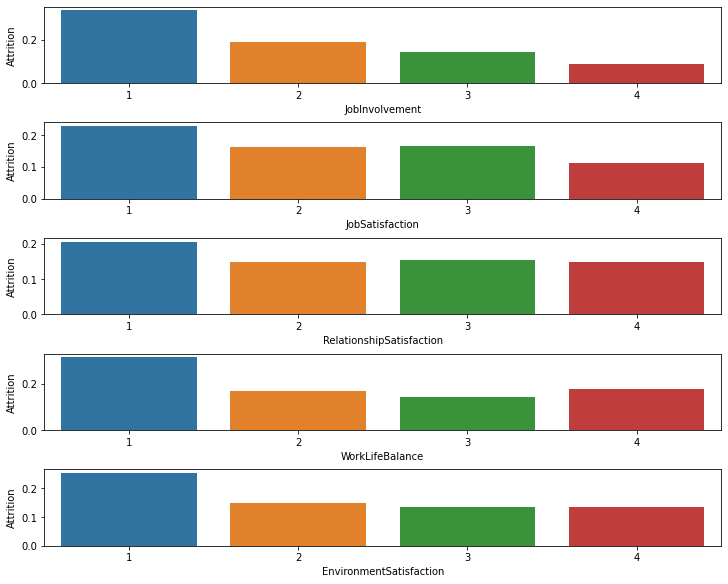

In [26]:
cols = ['JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'EnvironmentSatisfaction']
fig, ax = plt.subplots(len(cols),1, figsize= (10,8), constrained_layout=True)

for i, col in enumerate(cols):
    
    sns.barplot(col,'Attrition', data = df, ax = ax[i], ci = None)


Insights:


JobInvolvement 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

RelationshipSatisfaction 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance 
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
    
    

Intuitively, it can be clearly seen that dissatisfied employees having lower satisfaction and poor work life balance tend to have a higher attrition rate.

## Job Level and Job Role

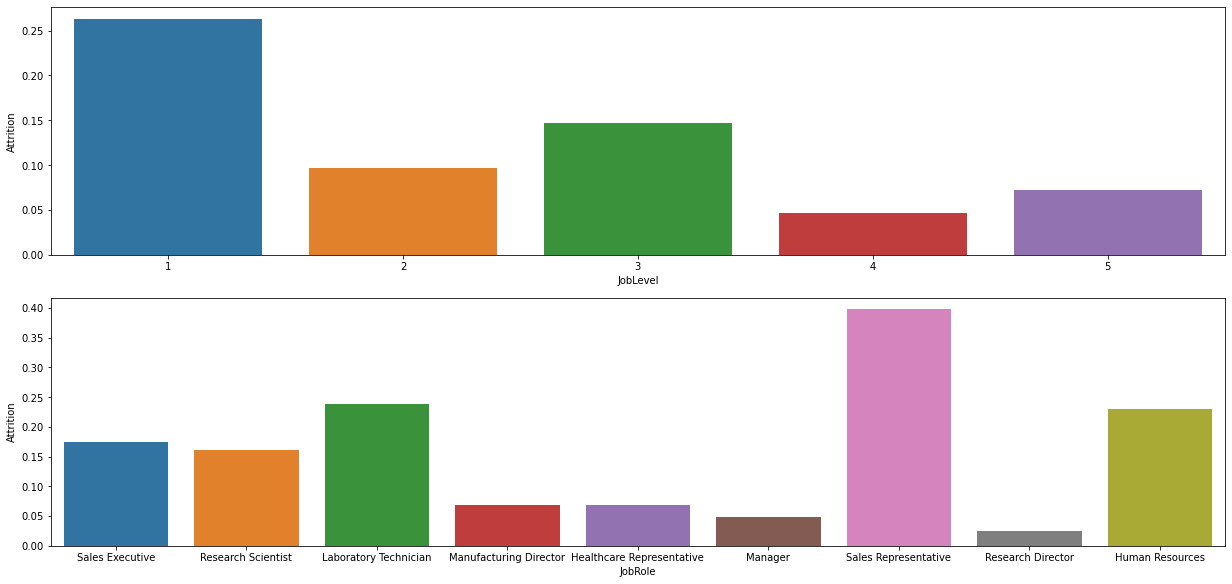

In [27]:
cols = ['JobLevel', 'JobRole']
fig, ax = plt.subplots(len(cols),1, figsize= (17,8), constrained_layout=True)

for i, col in enumerate(cols):
    
    sns.barplot(col,'Attrition', data = df, ax = ax[i], ci = None)

Insights:


a) Job Level: Less experienced employees comprises of a higher proportion of employees leaving the company.

b) Job Role: Sales Representatives followed by Human Resources and Lab Tehnicians tends to leave the company the most.


## Lets Uncover Some Other Insights

### a) Distance From Home


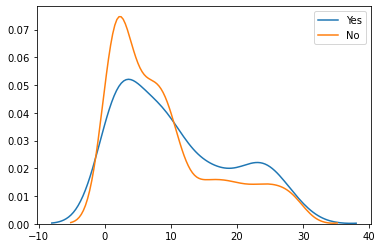

In [28]:
Attrition_Y = df[df['Attrition']==True]
Attrition_N = df[df['Attrition']==False]
sns.kdeplot(Attrition_Y.DistanceFromHome)
sns.kdeplot(Attrition_N.DistanceFromHome)
plt.legend(('Yes', 'No'))

Insights:

a) Most of the employees stay closer to the office location.

b) There is a higher proportion of attrited employees who stay far from the office than the proportion of employees who did not leave the company and stay far away from the office.

In [29]:

# Lets look at distance from home and attrition levels among various job roles.

df.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack()

Attrition,False,True
JobRole,,
Healthcare Representative,9.204918,17.666667
Human Resources,6.600000,13.416667
Laboratory Technician,9.329949,9.661290
Manager,7.927835,10.000000
Manufacturing Director,9.533333,8.800000
Research Director,8.474359,7.000000
Research Scientist,8.869388,9.765957
Sales Executive,9.026022,12.649123
Sales Representative,9.000000,8.151515


Insights:

Among the employees in various job roles, the mean distance of work from home for HealthCare Representatives, Human Resources Employees, Managers, and Sales Executives employees who left the company is larger than the mean distance of work from home for the employees who did not leave.

In [30]:
df[df['DistanceFromHome']>10].groupby('BusinessTravel').Attrition.mean()

BusinessTravel
Non-Travel           0.148936
Travel_Frequently    0.298851
Travel_Rarely        0.193548
Name: Attrition, dtype: float64

For employees staying far away (More than 10 kms away), the attrition rate for employees who need to travel frequently have comparatively higher attrition rate.

### b) Monthly Income and Attrition

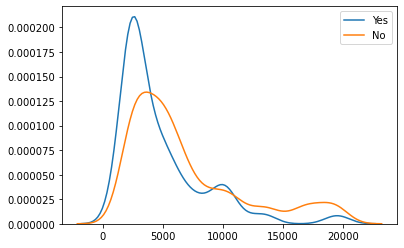

In [31]:
sns.kdeplot(Attrition_Y.MonthlyIncome)
sns.kdeplot(Attrition_N.MonthlyIncome)
plt.legend(('Yes', 'No'))

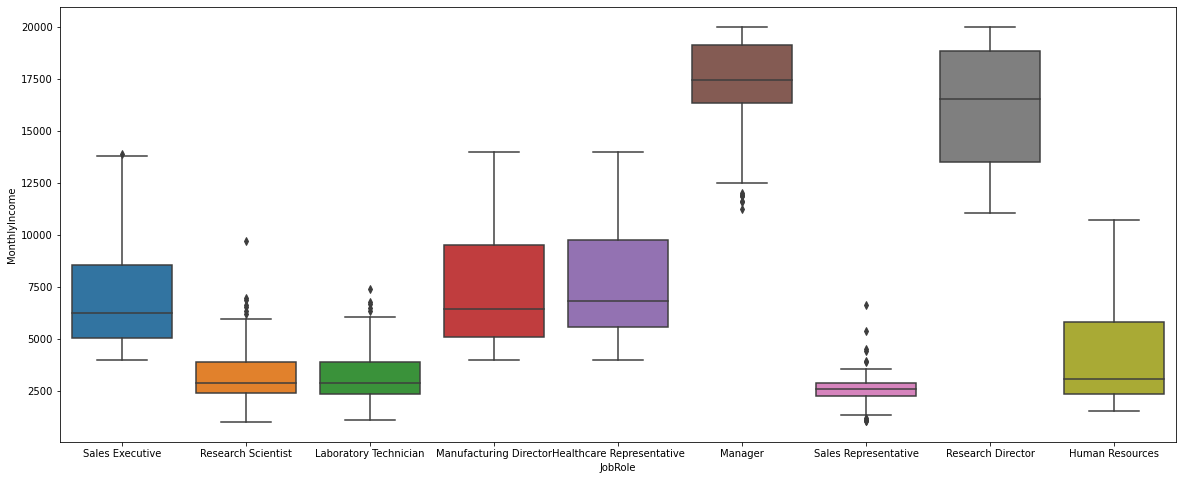

In [32]:
plt.figure(figsize=(20,8))
sns.boxplot('JobRole', 'MonthlyIncome',data = df)

Insight:

a) The median salary of Managers and Research Director is obviously on the higher side.

b) The median salary of Sales Representatives, Laboratory Technicians and Human Reources Employees tends to be on the lower side. In the above attrition rate vs job role graph, these groups comparatively had the highest attrition among the other roles. This possibly leads to the fact that lower monthly rate could be a cause for higher attrition rates of these employee groups.


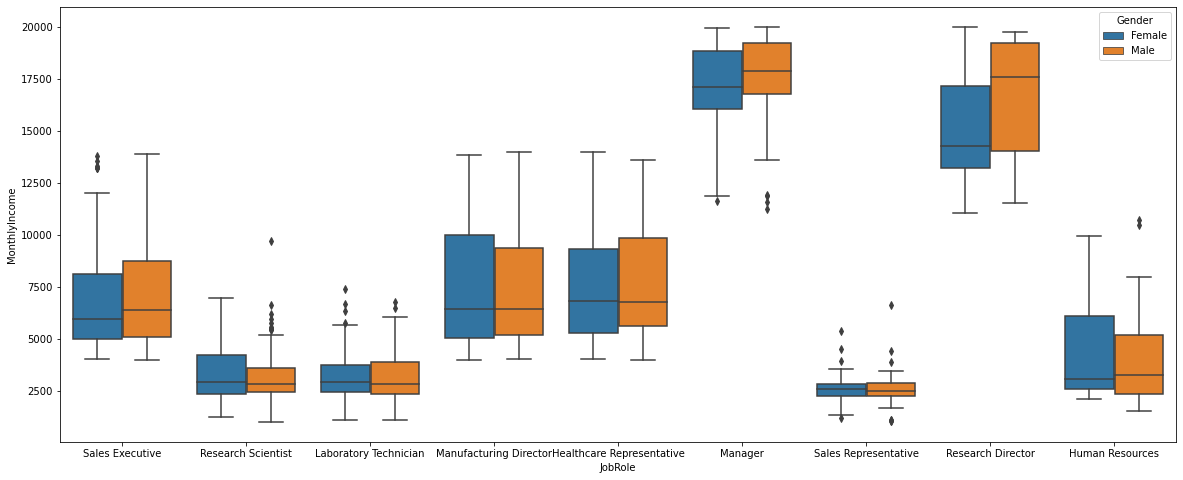

In [33]:
plt.figure(figsize=(20,8))
sns.boxplot('JobRole', 'MonthlyIncome', hue = 'Gender',data = df)

Further breaking down the monthly rate vs job role graph by gender, we can further inspect where the median salary difference between males and females are. There is a stark difference in the salary of males and females under the job role of Manager and Research Director.

### Correlation among other variables

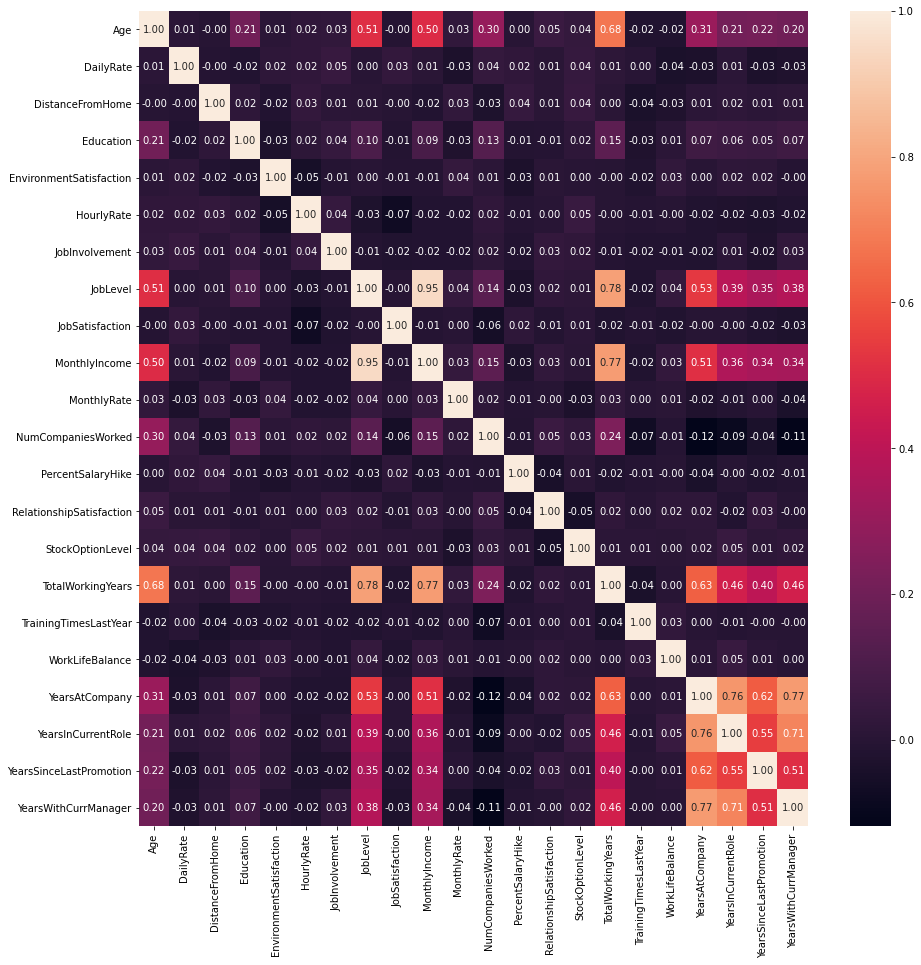

In [34]:
df_c = df.select_dtypes('int64')
plt.figure(figsize=(15,15))

sns.heatmap(df_c.corr(), annot = True, fmt = '.2f')

Insights:

a) Variables such as TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrentManager are highly corelated to each other. This can possibly lead to multicollinearity in the context of regression modelling. Interpreting it depends upon the modelling we wish to carry out.

b) This graph shows Pearson's correlation values, and there is a presence of high correlations values among different sets of variables such as Job Level and Monthly Income, Job Level and Total Working Hours and many more. However, Job Level seems to be an ordinal variable, we can inspect the correlation using Spearman's Correlation Co-efficients instead of Pearson's Co-efficent. http://geoinfo.amu.edu.pl/qg/archives/2011/QG302_087-093.pdf.

c) Similarly, Age seems to have a moderate linear relationship with MonthlyIncome, Total Working Years and MonthlyIncome which intuitively makes sense.

# FACTORS AFFECTING ATTRITION 

### Depending upon the business question at hand, there are numerous ways in which the dataset can be further manipulated. The finding above were really interesting and could have been made even better with deeper hypothesis testing and modelling with the consideration of appropriate assumptions wherever needed.


## a) **Age**: 

Younger people into the starting of their careers tend to move on for further studies, or for some more lucrative job opportunities. Additionally, people at younger age could also find it easy to relocate to other location. Hence, Age could be a possible predictor.

## b) **Satisfaction and Mental Well-being**: 

Toxic work environment or less motivation for work tends to decrease the productivity of the employees. Exit interviews can be carried out to ensure whether the workplace is free of any toxicity or factors leading to lower motivation.

## c) **Educational Factors**:

Such variables also show have varying level of attrition rates. These factors could also be incorporated as predictors. Employees leaving company to obtain higher credentials might be one of the reason.

## d) **Job Related Factors**:

Similarly, Job related features can also prove to be a predictor.

## e) **Daily Commute**:

Especially for employees leaving far away from the office location, daily longer commutes to work can be troublesome leading to attrition. Such employees can be provided with extra compensation or more flexible working hours. 

## f) **Monthly Income**:

This can also prove to be a predictor for the attrition level. Especially for certain groups of job roles such as Sales Representatives, Laboratory Technicians and Human Reources Employees.


Please feel free to comment on anything. Looking forward to learning from you. Thanks.